# 08.03 - Classification using PyCaret

This notebook is a modified version of the original Lab 06.01 - Logistic Regression and Lab 07.05 - Logistic Regression using Scikit Learn. In the previous labs, we utilized PyTorch and Scikit Learn to build our logistic regression models. However, in this notebook, we will be employing PyCaret to achieve the same objective.

## Graduate School Admissions

In this exercise, we're going to use logistic regression to solve a binary classification problem: "Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?"

Our dataset includes four columns:

- `admit`: A binary 0/1 variable indicating the admission status of a student. In this case, 1 means the student was admitted, and 0 implies the student was not admitted.
- `gre`: The [GRE (Graduate Record Exam)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations) score of the student.
- `gpa`: The student's Grade Point Average (GPA).
- `prestige`: This is a rating from 1-4 for the college's "prestige." A lower number indicates higher prestige.

In [1]:
# Import pandas library
import pandas as pd

# Read in the data.
# The function pd.read_csv() is used to read the csv file 'admissions.csv' from the current directory.
# The data is stored in a pandas DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types.
df = pd.read_csv('./admissions.csv')

# Check first five rows.
# The .head() function is used to get the first n rows of a DataFrame. By default, it returns the first 5 rows.
df.head()

# Check for missing values.
# The .isnull() function is used to detect missing values in the DataFrame.
# The .sum() function is then used to calculate the sum of these missing values.
df.isnull().sum()

# Drop every row that has a NA.
# First, the .shape attribute is used to get the current shape of the DataFrame (number of rows and columns).
df.shape
# The .dropna() function is used to remove missing values.
# The 'inplace=True' argument is used to make the change in the original DataFrame.
df.dropna(inplace=True)
# Finally, the shape of the DataFrame is checked again to see how many rows were dropped.
df.shape

(397, 4)

In [2]:
# Import the ClassificationExperiment class from the pycaret.classification module.
# PyCaret is a low-code machine learning library that automates the process of training and tuning models.
# The ClassificationExperiment class is used to create and manage classification experiments.

from pycaret.classification import ClassificationExperiment

# Instantiate an object of the ClassificationExperiment class.
# This object will be used to set up and run the classification experiment.
classification_experiment: ClassificationExperiment = ClassificationExperiment()

# Set up the classification experiment using the dataframe 'df' and specifying the target column.
# The 'setup' method initializes the environment in PyCaret and performs various preprocessing tasks.
# The 'df' argument is the dataframe containing the dataset.
# The 'target' argument specifies the target column, which in this case is 'admit'.
# The 'session_id' argument is used to set a random seed for reproducibility of results.
classification_experiment.setup(data=df, target='admit', session_id=123)

,Description,Value
0,Session id,123
1,Target,admit
2,Target type,Binary
3,Original data shape,"(397, 4)"
4,Transformed data shape,"(397, 4)"
5,Transformed train set shape,"(277, 4)"
6,Transformed test set shape,"(120, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [3]:
# Compare different classification models and select the best one based on the specified metric.
# The 'compare_models' method in PyCaret compares all available classification models in the library
# and returns the best model based on the evaluation metric provided.
# In this case, the models are compared using the Matthews Correlation Coefficient (MCC),
# which is a measure of the quality of binary classifications.
# The 'sort' argument specifies the metric to sort the models by. Here, it is set to "MCC".
# The method returns the best model object.

# Compare models and select the best one based on MCC.
best_classification = classification_experiment.compare_models(sort="MCC")

# The 'best_classification' variable holds the model that performed the best according to the MCC metric.
print(best_classification)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6937,0.6077,0.3417,0.4983,0.3964,0.2146,0.2200,0.0150
qda,Quadratic Discriminant Analysis,0.7116,0.6600,0.2181,0.5800,0.3094,0.1883,0.2195,0.0050
lightgbm,Light Gradient Boosting Machine,0.6820,0.6287,0.3528,0.5053,0.4025,0.1999,0.2109,0.0580
gbc,Gradient Boosting Classifier,0.6821,0.6226,0.3528,0.4998,0.4098,0.2036,0.2103,0.0160
nb,Naive Bayes,0.6970,0.6608,0.2847,0.4833,0.3517,0.1916,0.1970,0.0050
lda,Linear Discriminant Analysis,0.7044,0.6565,0.1931,0.4583,0.2674,0.1555,0.1702,0.0060
ridge,Ridge Classifier,0.7005,0.6547,0.1597,0.5083,0.2407,0.1362,0.1681,0.0050
lr,Logistic Regression,0.7007,0.6586,0.1819,0.4550,0.2578,0.1447,0.1607,0.2170
rf,Random Forest Classifier,0.6642,0.5996,0.2847,0.3897,0.3264,0.1332,0.1337,0.0220
dt,Decision Tree Classifier,0.6104,0.5639,0.4222,0.3925,0.4026,0.1184,0.1174,0.0060


AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


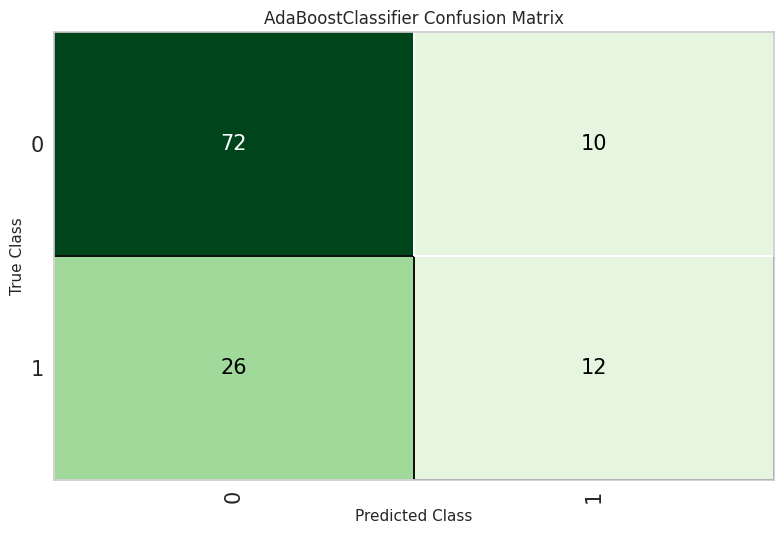

In [4]:
# Plot the confusion matrix for the best classification model.
# The 'plot_model' method in PyCaret is used to create various plots to evaluate the performance of a model.
# In this case, we are using it to plot the confusion matrix of the best classification model.
# A confusion matrix is a table that is used to describe the performance of a classification model.
# It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

# 'classification_experiment' is an instance of ClassificationExperiment.
# 'best_classification' is the best model selected based on the Matthews Correlation Coefficient (MCC).
# The 'plot' argument specifies the type of plot to create. Here, it is set to 'confusion_matrix'.

# Create and plot the confusion matrix for the best classification model.
classification_experiment.plot_model(best_classification, plot='confusion_matrix')

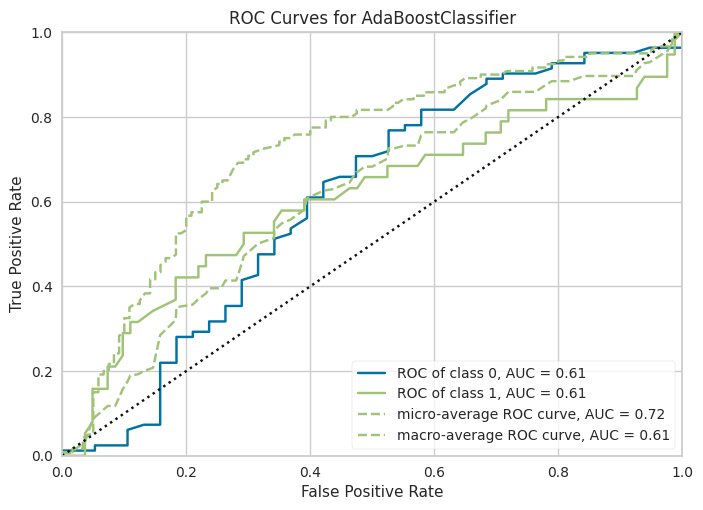

In [5]:
# Plot the AUC (Area Under the Curve) for the best classification model.
# The 'plot_model' method in PyCaret is used to create various plots to evaluate the performance of a model.
# In this case, we are using it to plot the AUC of the best classification model.
# AUC is a performance measurement for classification problems at various threshold settings.
# It represents the degree or measure of separability, indicating how much the model is capable of distinguishing between classes.

# 'classification_experiment' is an instance of ClassificationExperiment.
# This object is used to manage the classification experiment and its associated methods, including plotting.

# 'best_classification' is the best model selected based on the Matthews Correlation Coefficient (MCC).
# This model will be evaluated using the AUC plot.

# The 'plot' argument specifies the type of plot to create. Here, it is set to 'auc'.
# 'auc' stands for Area Under the Curve, which is used to measure the ability of the model to distinguish between classes.

# Create and plot the AUC for the best classification model.
classification_experiment.plot_model(best_classification, plot='auc')

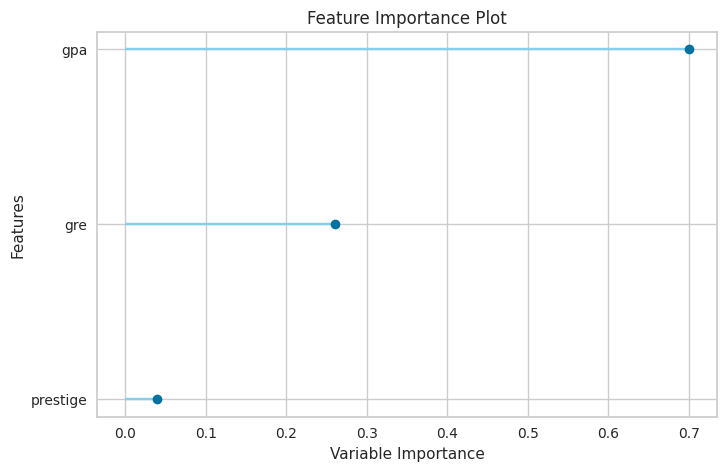

In [6]:
# Plot the feature importance for the best classification model.
# The 'plot_model' method in PyCaret is used to create various plots to evaluate the performance of a model.
# In this case, we are using it to plot the feature importance of the best classification model.
# Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

# 'classification_experiment' is an instance of ClassificationExperiment.
# This object is used to set up and manage the classification experiment and its associated methods, including plotting.

# 'best_classification' is the best model selected based on the Matthews Correlation Coefficient (MCC).
# This model will be evaluated using the feature importance plot.

# The 'plot' argument specifies the type of plot to create. Here, it is set to 'feature'.
# 'feature' stands for feature importance, which is used to measure the importance of each feature in making predictions.

# Create and plot the feature importance for the best classification model.
classification_experiment.plot_model(best_classification, plot='feature')

In [7]:
# Predict the classification for the dataset using the best classification model.
# The 'predict_model' method in PyCaret is used to make predictions on a given dataset using the specified model.
# In this case, we are using it to predict the classification of the dataset 'df' using 'best_classification'.

# 'classification_experiment' is an instance of ClassificationExperiment.
# This object is used to set up and manage the classification experiment and its associated methods, including prediction.

# 'best_classification' is the best model selected based on the Matthews Correlation Coefficient (MCC).
# This model will be used to make predictions on the dataset.

# The 'predict_model' method returns a DataFrame that includes the original dataset along with the predicted labels and probabilities.
# The 'pred_classification' variable will hold this DataFrame.

# 'pred_classification' will be a DataFrame that includes the original data along with the predicted labels.
# The type annotation indicates that 'pred_classification' is expected to be a DataFrame.
pred_classification: pd.DataFrame = classification_experiment.predict_model(best_classification)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7000,0.6069,0.3158,0.5455,0.4000,0.2185,0.2330
